# upload data

In [9]:
if(!require(readr)) install.packages("readr")
library(readr)

github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/biomass_cumulative.csv"
df=data.frame(read_csv(url(github),show_col_types = FALSE))
set.seed(100)

print(df[sample(nrow(df),5),])

    Treatment Block Plant Branch Days Biomass
503   Control   III     5      1   66  360.73
358   Control     I     5      4   59  345.46
470   Control     I     8      3   66  403.13
516   Control     I     1      4   73  565.40
98    Drought   III     3      2   59  162.15


# install package

In [10]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("datacume", quietly = TRUE)) {
  remotes::install_github("agronomy4future/datacume", force= TRUE)
}
library(remotes)
library(datacume)

# run the package

In [11]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)

dataA= datacume(
              data= df,
              group_vars= c("Treatment", "Block", "Plant"),
              time_var= Days,
              response_vars= c("Biomass"))

print(dataA[sample(nrow(dataA),5),])

# A tibble: 5 × 6
  Treatment Block Plant  Days Biomass Cumulative_Biomass
  <chr>     <chr> <dbl> <dbl>   <dbl>              <dbl>
1 Control   III       1    52    309.               449.
2 Drought   III       2    66    168.               292.
3 Control   II        4    59    207.               567.
4 Control   I         8    59    361.               996.
5 Control   III       5    59    423.               575.


In [12]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)

dataB= datacume(
              data= df,
              group_vars= c("Treatment", "Block"),
              time_var= Days,
              response_vars= c("Biomass"))

print(dataB[sample(nrow(dataB),5),])

# A tibble: 5 × 5
  Treatment Block  Days Biomass Cumulative_Biomass
  <chr>     <chr> <dbl>   <dbl>              <dbl>
1 Drought   II       66    176.               574.
2 Drought   II       73    195.               769.
3 Drought   IV       66    218.               705.
4 Drought   IV       73    181.               886.
5 Drought   I        59    255.               546.


# summarize data

In [13]:
summary=data.frame(dataA %>%
                      group_by(Treatment, Days) %>%
                      dplyr::summarize(across(c(Cumulative_Biomass),
                                                    .fns= list(Mean=~mean(., na.rm= TRUE),
                                                               SD= ~sd(., na.rm= TRUE),
                                                               n=~length(.),
                                                               se=~sd(.,na.rm= TRUE) / sqrt(length(.))))))%>%
  ungroup()

print(summary)

`summarise()` has grouped output by 'Treatment'. You can override using the
`.groups` argument.


   Treatment Days Cumulative_Biomass_Mean Cumulative_Biomass_SD
1    Control   45                206.1908             146.19012
2    Control   52                563.6869             156.95986
3    Control   59                723.4944             231.92993
4    Control   66               1106.6503             263.58099
5    Control   73               1445.3170             331.11848
6    Drought   45                124.5334              83.77338
7    Drought   52                239.8938              87.31755
8    Drought   59                341.1837             149.34782
9    Drought   66                481.5725             165.35873
10   Drought   73                641.8063             168.45339
   Cumulative_Biomass_n Cumulative_Biomass_se
1                    28              27.62734
2                     9              52.31995
3                    29              43.06831
4                    26              51.69249
5                    29              61.48716
6                   

In [14]:
summaryB=data.frame(dataB %>%
                      group_by(Treatment, Days) %>%
                      dplyr::summarize(across(c(Cumulative_Biomass),
                                                    .fns= list(Mean=~mean(., na.rm= TRUE),
                                                               SD= ~sd(., na.rm= TRUE),
                                                               n=~length(.),
                                                               se=~sd(.,na.rm= TRUE) / sqrt(length(.))))))%>%
  ungroup()

print(summaryB[sample(nrow(summaryB),5),])

`summarise()` has grouped output by 'Treatment'. You can override using the
`.groups` argument.


  Treatment Days Cumulative_Biomass_Mean Cumulative_Biomass_SD
1   Control   45                203.4252              35.97830
9   Drought   66                648.3863              83.42075
6   Drought   45                116.9966              19.16112
4   Control   66               1406.7314             103.80340
8   Drought   59                461.0574              69.11151
  Cumulative_Biomass_n Cumulative_Biomass_se
1                    4             17.989148
9                    4             41.710377
6                    4              9.580561
4                    4             51.901700
8                    4             34.555753


# create figure

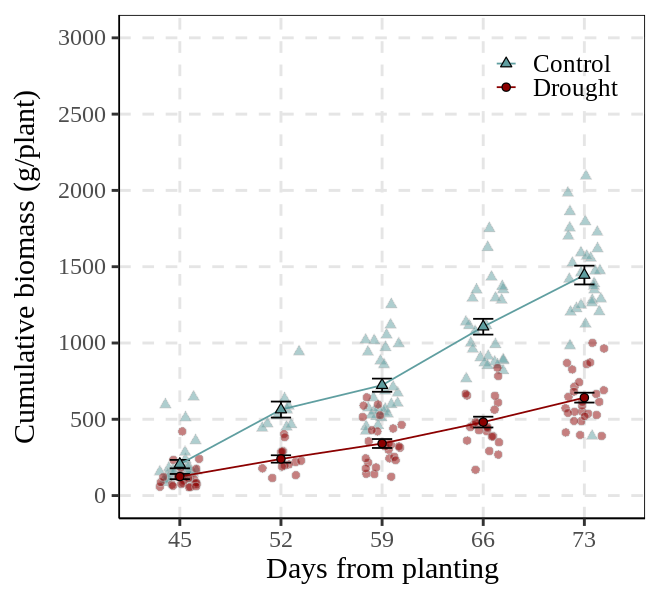

In [15]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

Fig1= ggplot() +
  geom_jitter(data= dataA,
              aes(x= as.factor(Days), y= Cumulative_Biomass, fill= Treatment, shape=Treatment),
              width=0.2, alpha=0.5, size=2, color="grey75") +
  geom_errorbar(data= summary, aes(x=as.factor(Days), y= Cumulative_Biomass_Mean,
                ymin= Cumulative_Biomass_Mean - Cumulative_Biomass_se,
                ymax= Cumulative_Biomass_Mean + Cumulative_Biomass_se),
                width=0.2, linewidth=0.5, color="black") +
  geom_line(data= summary, aes(x=as.factor(Days), y=Cumulative_Biomass_Mean,
            color=Treatment, group=Treatment)) +
  geom_point(data= summary, aes(x=as.factor(Days), y=Cumulative_Biomass_Mean,
             fill=Treatment, shape=Treatment), size=2) +
  scale_color_manual(values= c("cadetblue", "darkred"))+
  scale_fill_manual(values= c("cadetblue", "darkred"))+
  scale_shape_manual(values= c(24,21))+
  scale_y_continuous(breaks = seq(0,3000,500), limits = c(0,3000)) +
  labs(x="Days from planting", y="Cumulative biomass (g/plant)") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position=c(0.85,0.88),
        legend.title=element_blank(),
        legend.key.size=unit(0.5,'cm'),
        legend.key=element_rect(color=alpha("white",.05), fill=alpha("white",.05)),
        legend.text=element_text(size=15),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig1)

ggsave("Fig1.png", plot= Fig1, width=5.5, height= 5, dpi= 300)

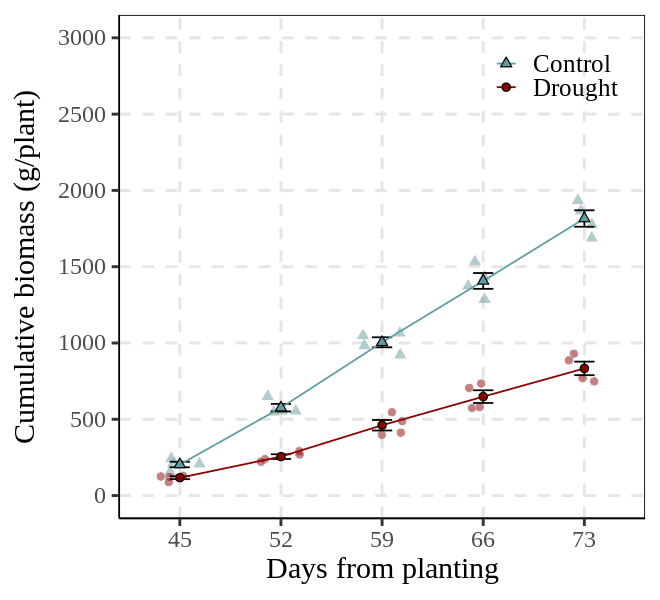

In [16]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

Fig1= ggplot() +
  geom_jitter(data= dataB,
              aes(x= as.factor(Days), y= Cumulative_Biomass, fill= Treatment, shape=Treatment),
              width=0.2, alpha=0.5, size=2, color="grey75") +
  geom_errorbar(data= summaryB, aes(x=as.factor(Days), y= Cumulative_Biomass_Mean,
                ymin= Cumulative_Biomass_Mean - Cumulative_Biomass_se,
                ymax= Cumulative_Biomass_Mean + Cumulative_Biomass_se),
                width=0.2, linewidth=0.5, color="black") +
  geom_line(data= summaryB, aes(x=as.factor(Days), y=Cumulative_Biomass_Mean,
            color=Treatment, group=Treatment)) +
  geom_point(data= summaryB, aes(x=as.factor(Days), y=Cumulative_Biomass_Mean,
             fill=Treatment, shape=Treatment), size=2) +
  scale_color_manual(values= c("cadetblue", "darkred"))+
  scale_fill_manual(values= c("cadetblue", "darkred"))+
  scale_shape_manual(values= c(24,21))+
  scale_y_continuous(breaks = seq(0,3000,500), limits = c(0,3000)) +
  labs(x="Days from planting", y="Cumulative biomass (g/plant)") +
  theme_classic(base_size=18, base_family="serif")+
  theme(legend.position=c(0.85,0.88),
        legend.title=element_blank(),
        legend.key.size=unit(0.5,'cm'),
        legend.key=element_rect(color=alpha("white",.05), fill=alpha("white",.05)),
        legend.text=element_text(size=15),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.border= element_rect(color="black", fill=NA, linewidth=0.5),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig1)

ggsave("Fig1.png", plot= Fig1, width=5.5, height= 5, dpi= 300)